**Student Performance in Exam**

to know the performance of each student in class with different background and categories.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
passScore = 50

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print(df.shape)

(1000, 8)


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Math Score

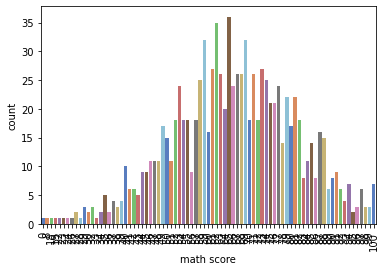

In [8]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [17]:
df['Math_PassStatus'] = np.where(df['math score']<passScore, 'F', 'P')
df.Math_PassStatus.value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

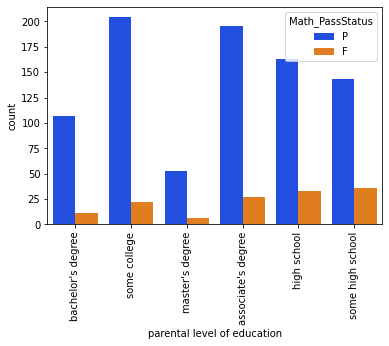

In [18]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

# Reading Score

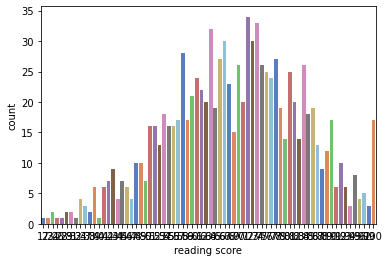

In [19]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [20]:
df['Reading_PassStatus'] = np.where(df['reading score']<passScore, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    910
F     90
Name: Reading_PassStatus, dtype: int64

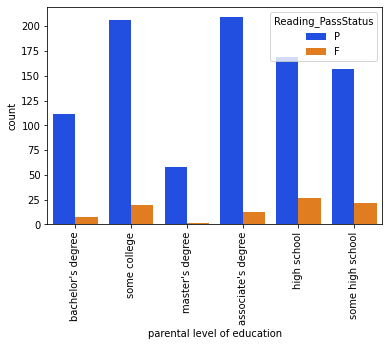

In [21]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

# Writing Score

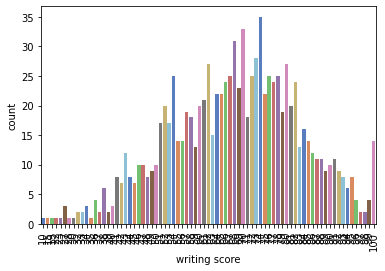

In [22]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [23]:
df['Writing_PassStatus'] = np.where(df['writing score']<passScore, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    886
F    114
Name: Writing_PassStatus, dtype: int64

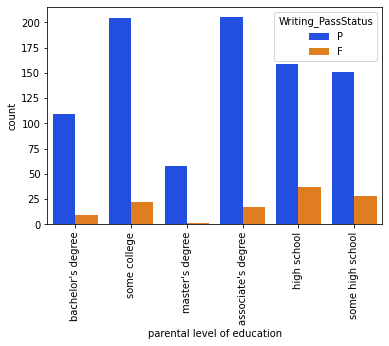

In [24]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

# Amount of Student Who Pass the Exam

In [25]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    812
F    188
Name: OverAll_PassStatus, dtype: int64

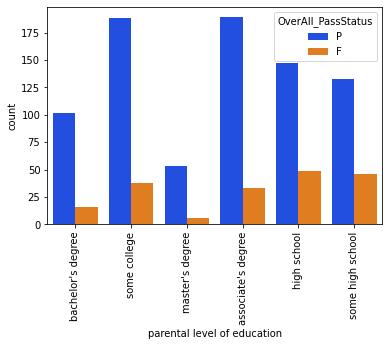

In [26]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [29]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

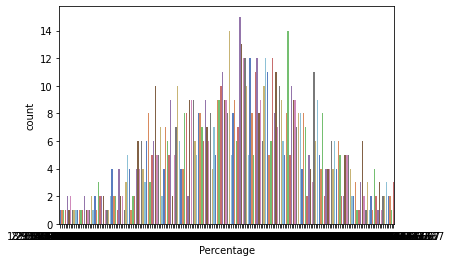

In [30]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [34]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 90 ):
        return 'A'
    if ( Percentage >= 75):
        return 'B'
    if ( Percentage >= 65):
        return 'C'
    if ( Percentage >= 55):
        return 'D'
    if ( Percentage >= 50):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

C    277
B    272
F    188
D    187
A     52
E     24
Name: Grade, dtype: int64

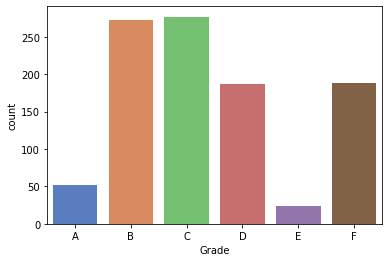

In [35]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

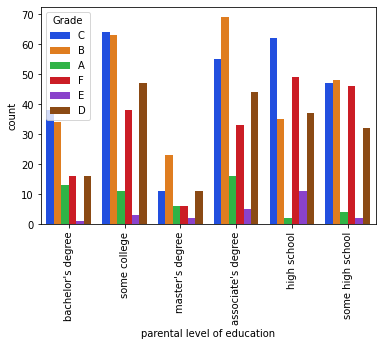

In [36]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 